In [1]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, minimize

air = ml.Non_Dispersion(1)
OC = ml.Cauchy([1.51082517, 5.69129102e-03], 9.70850610e-04)
SiN = ml.Cauchy([1.85001015, 3.50497748e-03], 4.50757521e-04)
SiO2 = ml.Cauchy([1.48878307, 1.44759349e-03], 8.82534146e-04)
ITO = ml.Cauchy([1.68689504, 5.38710310e-02], 8.33721475e-03)
sub = ml.Cauchy([1.52990893, 1.48423855e-03])

#R_scan = pd.read_csv('./spectrum/rev1.csv')['SCAN'].values
R_scan = pd.read_csv('./spectrum/LENS/rev1/R_5_B.csv')['SCAN'].values
wl = np.linspace(400, 700, 301)

hypo_dia = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, SiO2, SiN, sub],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(wl, 5)

hypo_bri = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, OC, ITO, SiO2, SiN, sub],
    [None, th[0]-1400, th[1], th[2], th[3], 1200, 150, th[4], th[5], None]
).reflectance(wl)

hypo_tra = lambda th: tm.Design(
    [air, OC, SiN, SiO2, SiO2, SiN, sub],
    [None, th[0], th[1], th[2], th[4], th[5], None]
).reflectance(wl)

fom = lambda th: tm.RMSE(R_scan-0.3, 100*hypo_dia(th))

In [16]:
sol = differential_evolution(
    fom, [
        (1500,2300),(4,30),(20,80),(20,30),(20,80),(4,30),
    ], disp=True, polish=False, popsize=15, mutation=0.3, recombination=0.9, strategy='best1bin'
)
print(sol.x)

differential_evolution step 1: f(x)= 0.506402
differential_evolution step 2: f(x)= 0.358947
differential_evolution step 3: f(x)= 0.358947
differential_evolution step 4: f(x)= 0.357711
differential_evolution step 5: f(x)= 0.35692
differential_evolution step 6: f(x)= 0.356356
[1750.94447882   24.50967406   31.87328912   22.93426661   29.4735891
   16.22639783]


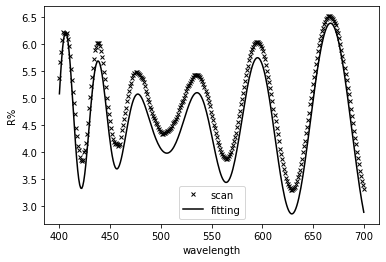

0.3563559408863153


In [2]:
m1 = [1750.9444788,24.50967406,31.87328912,22.93426661,29.4735891,16.22639783]
tk = m1
plt.plot(wl, R_scan-0.3, 'kx', label = 'scan', markersize = 4)
plt.plot(wl, 100*hypo_dia(tk), '-k', label = 'fitting')
plt.legend(loc = 'best')
plt.xlabel('wavelength')
plt.ylabel('R%')
#plt.savefig('LENS_rev1_newn.png')
plt.show()
print(tm.RMSE(R_scan-0.3,100*hypo_dia(tk)))

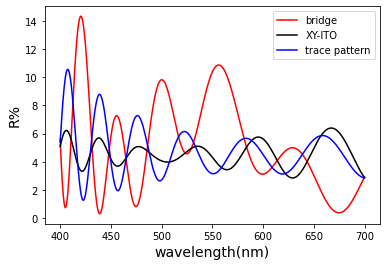

24.034018985949963
71.02054158768071
delta_dt: 1.0997291325770855
delta_db: 3.2497002952786778
trace 4.783366631024816
bridge: 5.160116861760516
diamond: 4.575718830961962


In [3]:
plt.plot(wl, 100*hypo_bri(tk), '-r', label = 'bridge')
plt.plot(wl, 100*hypo_dia(tk), '-k', label = 'XY-ITO')
plt.plot(wl, 100*hypo_tra(tk), '-b', label = 'trace pattern')
plt.xlabel('wavelength(nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.legend(loc = 'best')
#plt.savefig('LENS_rev1_newn_simulation.png')
plt.show()

delta_d_t = np.mean(abs(100*(hypo_dia(tk)-hypo_tra(tk))))
delta_d_b = np.mean(abs(100*(hypo_dia(tk)-hypo_bri(tk))))
print(100*delta_d_t/np.mean(100*hypo_dia(tk)))
print(100*delta_d_b/np.mean(100*hypo_dia(tk)))
print('delta_dt:',delta_d_t)
print('delta_db:',delta_d_b)
print('trace',np.mean(100*hypo_tra(tk)))
print('bridge:',np.mean(100*hypo_bri(tk)))
print('diamond:',np.mean(100*hypo_dia(tk)))

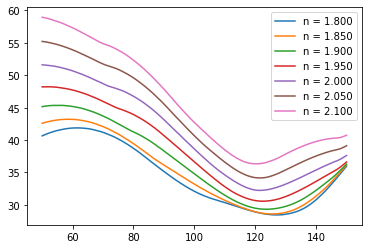

In [29]:
angle = [5.0,15.0,30.0,45.0,60.0]
aa = 60
d = np.linspace(50,150,101)
for n in np.linspace(1.8,2.1,7):
    b = []
    SiN = ml.Non_Dispersion(n)
    for i in d:
        tk = [1750.9444788,24.50967406,31.87328912,22.93426661,29.4735891,16.22639783]
        hypo_dia = lambda th: tm.Design(
            [air, OC, SiN, SiO2, ITO, SiO2, SiN, sub],
            [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
        ).reflectance(wl, aa)
        hypo_bri = lambda th: tm.Design(
            [air, OC, SiN, SiO2, ITO, OC, ITO, SiO2, SiN, sub],
            [None, th[0]-1250-i, th[1], th[2], th[3], 1250, i, th[4], th[5], None]
        ).reflectance(wl, aa)
        delta_d_b = np.mean(abs(100*(hypo_dia(tk)-hypo_bri(tk))))
        b.append(100*delta_d_b/np.mean(100*hypo_dia(tk)))
    plt.plot(d,b, label = 'n = {:.3f}'.format(n))
plt.legend(loc = 'best')
plt.savefig('rev1_angle60')
plt.show()